In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
# creating a constant
hello = tf.constant('Hello World')
print(hello)
# Here, b'Hello World' is the name of the tensor, we have not given any shape

tf.Tensor(b'Hello World', shape=(), dtype=string)


In [0]:
hello_2 = tf.constant('Hello World',shape=[6,2],name='hello')
hello_3 = tf.constant('Hello World',shape=[6,2],name='hello')
print(hello_2)
print(hello_3)

tf.Tensor(
[[b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']], shape=(6, 2), dtype=string)
tf.Tensor(
[[b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']], shape=(6, 2), dtype=string)


In [0]:
# Computational Graph
# Lets create 2 nodes in graph
a = tf.constant([1.2],name='first',dtype=tf.float32) 
b = tf.constant([3.4],name='Second',dtype=tf.float32) 
c = tf.add(a,b,name='Final')

In [0]:
print(c)

tf.Tensor([4.6000004], shape=(1,), dtype=float32)


In [0]:
# Starting a session will improve the computational power, in a local computer
#With tf.Session() as sess():
#  print(sess.run(c))
# The run method, will create and work on 3 nodes.

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
boston_housing = keras.datasets.boston_housing

In [0]:
# Load the features and target variable
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# Printing data
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features


57344/57026 [==============================] - 0s 0us/step
Training set: (404, 13)
Testing set:  (102, 13)


The dataset contains 13 different features:
Per capita crime rate.
The proportion of residential land zoned for lots over 25,000 square feet.
The proportion of non-retail business acres per town.
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
Nitric oxides concentration (parts per 10 million).
The average number of rooms per dwelling.
The proportion of owner-occupied units built before 1940.
Weighted distances to five Boston employment centers.
Index of accessibility to radial highways.
Full-value property-tax rate per $10,000.
Pupil-teacher ratio by town.
1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
Percentage lower status of the population.


In [0]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [0]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [0]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [0]:
# Normalize features
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [0]:


def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'mse',
              metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the model
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

#plot_history(history)


....................................................................................................
....................................................................................................
.............................................................................................

In [0]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2472.91


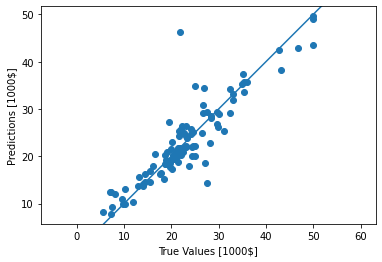

In [0]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])


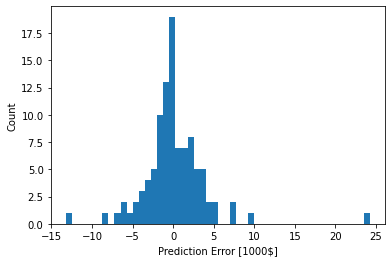

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")